In [1]:
#MCMC Metropolis Hastings Algorithm
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget


In [15]:
def log_prob(x):
     return -0.5 * np.sum(x ** 2)

In [16]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize,
                             high=x + 0.5 * stepsize,
                             size=x.shape)

In [17]:
def p_acc(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

In [18]:
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    # here we determine whether we accept the new state or not:
    # we draw a random number uniformly from [0,1] and compare
    # it with the acceptance probability
    accept = np.random.random() < p_acc(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

In [19]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept

    acceptance_rate = n_accepted / float(n_total)

    return chain, acceptance_rate

In [20]:
chain, acceptance_rate = build_MH_chain(np.array([2.0]), 3.0, 10000, log_prob)
chain = [state for state, in chain]
print("Acceptance rate: {:.3f}".format(acceptance_rate))
last_states = ", ".join("{:.5f}".format(state)
                        for state in chain[-10:])
print("Last ten states of chain: " + last_states)

Acceptance rate: 0.722
Last ten states of chain: 2.49529, 2.30015, 2.30015, 1.79623, 0.56744, 0.56744, -0.05396, -0.05396, 0.43103, -0.77000


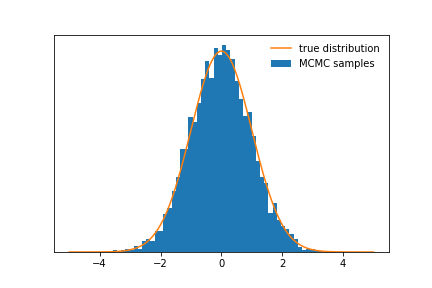

In [21]:
def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad

    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

fig, ax = plt.subplots()
plot_samples(chain[500:], log_prob, ax)
# despine(ax)
ax.set_yticks(())
plt.show()